# Decay
Here is the exercise presented in chapter 8 of the book.

**Exercise:** Unstable particles are emitted from a source and decay at a distance x, a real number that has an exponential probability distribution with parameter λ. Decay events can only be observed if they occur in a window extending from x = 1 cm to x = 20 cm. N decays are observed at locations {1.5, 2, 3, 4, 5, 12} cm. What is the posterior distribution of λ?

In [1]:
import thinkbayes2
import thinkplot
import numpy as np
from math import exp

**Solution**: here it looks like the usual problem: set a prior on lambda (e.g. uniform, or whatever), then get the posterior using Bayes' theorem: P($\lambda$|x) $\propto$ P(x|$\lambda$)P($\lambda$). P(x|$\lambda$) is the likelihood which is exponential.

Let's use the usual code structure. They hypotheses on $\lambda$ are represented by the actual values.

In [31]:
class Decay(thinkbayes2.Suite):
    
    def __init__(self, label=None):
        
        pmf = thinkbayes2.MakeUniformPmf(0.001, 2, 1001)
        
        thinkbayes2.Suite.__init__(self, pmf, label=label)
        
    
    def Likelihood(self, data, hypo):
        
        lam = hypo
        x = data
        
        like = thinkbayes2.EvalExponentialPdf(x, lam)
        return like

In [32]:
decay = Decay(label='unconstrained')

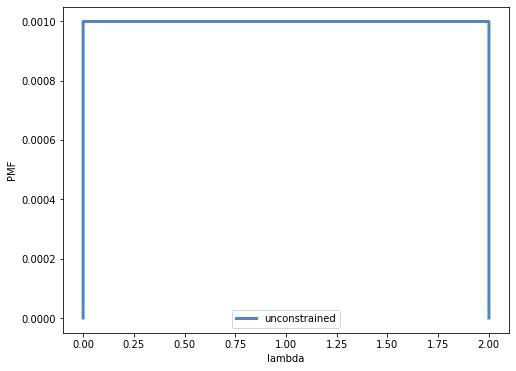

In [33]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Pmf(decay)
thinkplot.Config(xlabel='lambda',
                ylabel='PMF')

In [34]:
data = [1.5, 2, 3, 4, 5, 12]
decay.UpdateSet(data)

3.025218642561167e-08

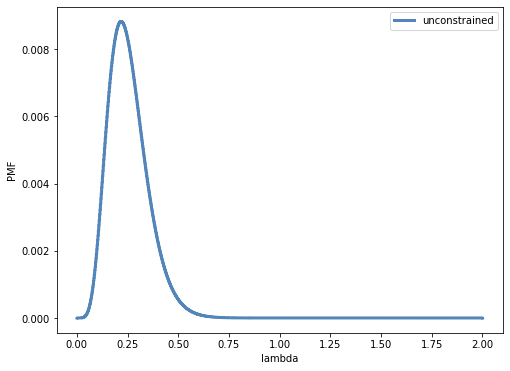

In [35]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Pmf(decay)
thinkplot.Config(xlabel='lambda',
                ylabel='PMF')

In [36]:
print('mean of the posterior:', decay.Mean())

mean of the posterior: 0.25454545454545363


So far it has been simple, but the condition that decays are observable only in a limited range of x was not used. 

In order to include the constraints, one should consider the following: the probability of a particle decaying within the range includes the probability that the particle has not decayed in the previous range, i.e. in x < 1, and the probability that it won't decay afterwards, i.e. x > 20.

This probability is computed using as follows:
P( low < x < high ) = (integral of the exponential pdf between low and high) = $e^{-\lambda \rm{low}} - e^{-\lambda \rm{high}}$

This probability has to be taken into account in the likelihood, in such a way that the total probability of observing a data point withing the low-high range is 1, i.e. we have to divide the original likelihood by the probability computed above.

In [37]:
class Decay2(thinkbayes2.Suite):
    ## use the default __init__
    
    def Likelihood(self, data, hypo, low=1., high=20.):
        
        x = data
        lam = hypo
        
        factor = exp(-low * lam) - exp(-high * lam)
        
        like = thinkbayes2.EvalExponentialPdf(x, lam) / factor
        
        return like

In [38]:
low = 0.001
high = 2

hypos = np.linspace(low, high, 1001)

decay2 = Decay2(hypos, label='with constraints')

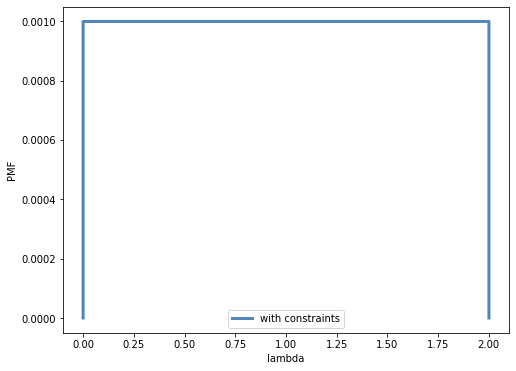

In [39]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Pmf(decay2)
thinkplot.Config(xlabel='lambda',
                ylabel='PMF')

In [40]:
decay2.UpdateSet(data)

1.8732051114464375e-07

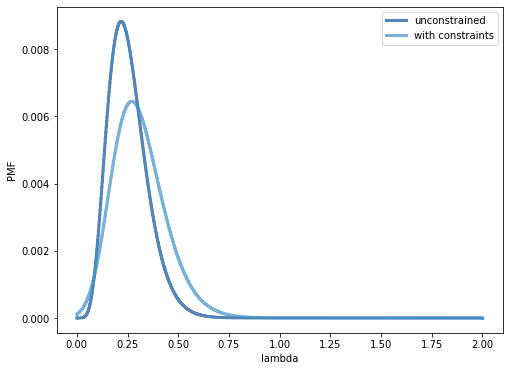

In [41]:
thinkplot.Clf()
thinkplot.PrePlot(num=2)
thinkplot.Pmfs([decay, decay2])
thinkplot.Config(xlabel='lambda',
                ylabel='PMF')

In [42]:
print('mean of unconstrained posterior:', decay.Mean())
print('mean of constrained posterior:', decay2.Mean())

mean of unconstrained posterior: 0.25454545454545363
mean of constrained posterior: 0.3084496182958662
